# Working on Titanic Dataset

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [209]:
dataset=pd.read_csv("train.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [210]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [211]:
dataset.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [212]:
[print(columns,np.unique(dataset[columns].isnull())) for columns in dataset.columns]

PassengerId [False]
Survived [False]
Pclass [False]
Name [False]
Sex [False]
Age [False  True]
SibSp [False]
Parch [False]
Ticket [False]
Fare [False]
Cabin [False  True]
Embarked [False  True]


[None, None, None, None, None, None, None, None, None, None, None, None]

In [213]:
list((columns,np.unique(dataset[columns].astype(str)).size)for columns in dataset.columns)

[('PassengerId', 891),
 ('Survived', 2),
 ('Pclass', 3),
 ('Name', 891),
 ('Sex', 2),
 ('Age', 89),
 ('SibSp', 7),
 ('Parch', 7),
 ('Ticket', 681),
 ('Fare', 248),
 ('Cabin', 148),
 ('Embarked', 4)]

In [214]:
dataset.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [215]:
dataset[['Sex','Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [216]:
dataset.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [217]:
dataset[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [218]:
dataset.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [219]:
dataset[['SibSp','Survived']].groupby('SibSp',as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [220]:
dataset.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [221]:
dataset[['Parch','Survived']].groupby('Parch',as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [222]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [223]:
dataset[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


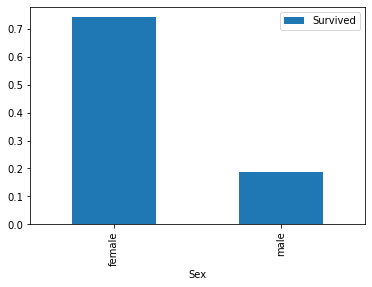

In [224]:
survived_sex=dataset.pivot_table(index="Sex",values="Survived")
survived_sex.plot.bar()
plt.show()

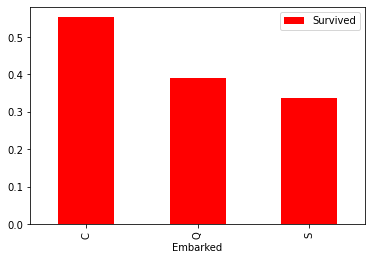

In [225]:
survived_sex=dataset.pivot_table(index="Embarked",values="Survived")
survived_sex.plot.bar(color="red")
plt.show()

In [226]:
correlation_matrix=dataset.corr(method='pearson')
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


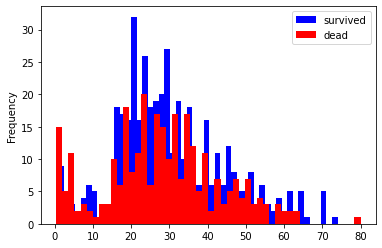

In [227]:
survived=dataset[dataset["Survived"]==1]
dead=dataset[dataset["Survived"]==0]
dead["Age"].plot.hist(color='blue',bins=50)
survived["Age"].plot.hist(color='red',bins=50)

plt.legend(['survived','dead'])
plt.show()

In [228]:
d1=dataset[['Survived','Pclass','Sex','Age','Fare','Embarked']]


In [229]:
d1=d1.dropna(subset=["Age","Pclass","Embarked","Sex"])

In [230]:
d1.shape
d1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [231]:
d2 = pd.get_dummies(d1,columns=['Sex','Embarked'])

In [232]:
d2.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [233]:
d2.Fare.sort_values(ascending=False)

737    512.3292
679    512.3292
258    512.3292
27     263.0000
438    263.0000
         ...   
806      0.0000
302      0.0000
271      0.0000
179      0.0000
597      0.0000
Name: Fare, Length: 712, dtype: float64

In [234]:
titanic = d2
y=d2.loc[:,"Survived"].values
x=d2.loc[:,["Pclass","Age","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]

In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# using Decision tree

In [236]:
from sklearn.tree import DecisionTreeRegressor
d_tree=DecisionTreeRegressor()
d_tree.fit(x_train,y_train)
y_pred=d_tree.predict(x_test)



In [237]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, y_pred.round())

0.7832167832167832

In [238]:
cm=confusion_matrix(y_test,y_pred.round())
print(cm)

[[63 19]
 [12 49]]


In [240]:
from sklearn.tree import export_graphviz
export_graphviz(d_tree,out_file="treeak2.dot")

# using logistic regression

In [200]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_pred1=reg.predict(x_test)

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, y_pred1.round())

0.7191011235955056

In [202]:
cm=confusion_matrix(y_test,y_pred1.round())
print(cm)

[[85 20]
 [30 43]]


# using random forest tree

In [203]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)

In [204]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, y_pred2.round())

0.7921348314606742

In [205]:
cm=confusion_matrix(y_test,y_pred2.round())
print(cm)

[[92 13]
 [24 49]]
